In [1]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート2025年版
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = {'hard': 1.5, 'price':3, 'sale':2, 'soft':1.0}

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()

# 国内ゲームハード週販レポート (2025-09-28) 

* ハードウェアの販売データはファミ通の調査結果を元にしています。
* 一部のデータについては処理の都合上、1週間毎の値にアレンジしています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移


サイレントヒルf効果でセール期間外にも関わらずPS5が驚異の1万台超えです。
しかしNintendo Switchも増えているのでSwitchは越えられず。

次回集計ではGhost of Yoteiとマリオギャラクシー1＆2の効果でハード販売への好影響を期待したいですね。

In [2]:
def chart_4weeks() -> None:
    df1 = hs.load_hard_sales()
    # 4 weeks before
    before_4weeks = hs.current_report_date(df1) - Timedelta(weeks=4-1)
    (out1, style1) = ch.chart_units_by_date_hw(df1, begin=before_4weeks)
    display(style1)
    
chart_4weeks()

## 2025年の週販推移

10月から増えるといいですね。って感じのグラフが続いています。

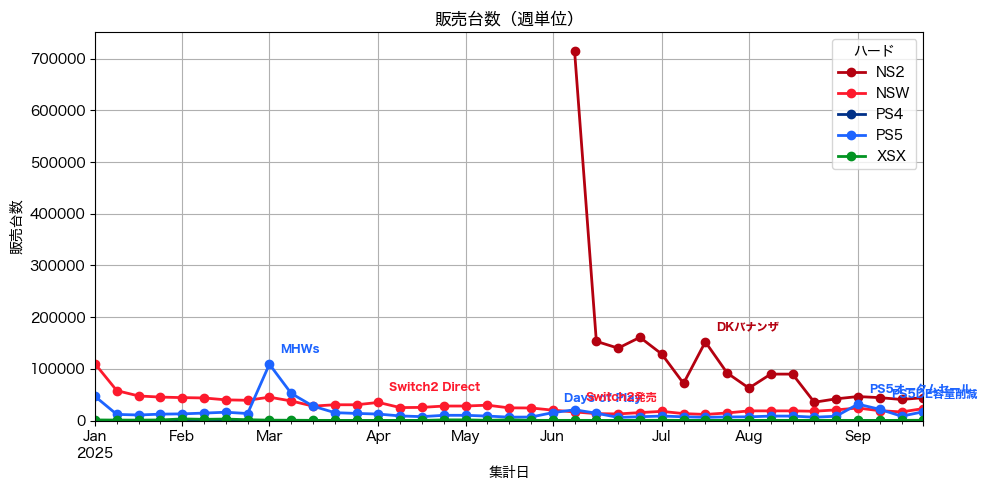

In [4]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), event_mask = report_event_mask)

### 2025年の週販推移(拡大）

サイレントヒルf効果が顕著です。セール終了直後に本体を牽引できているので
「普段PS5に関心が無いけど、サイレントヒルfを急に遊びたくなってPS5を買った」という人が多かったんでしょうか。


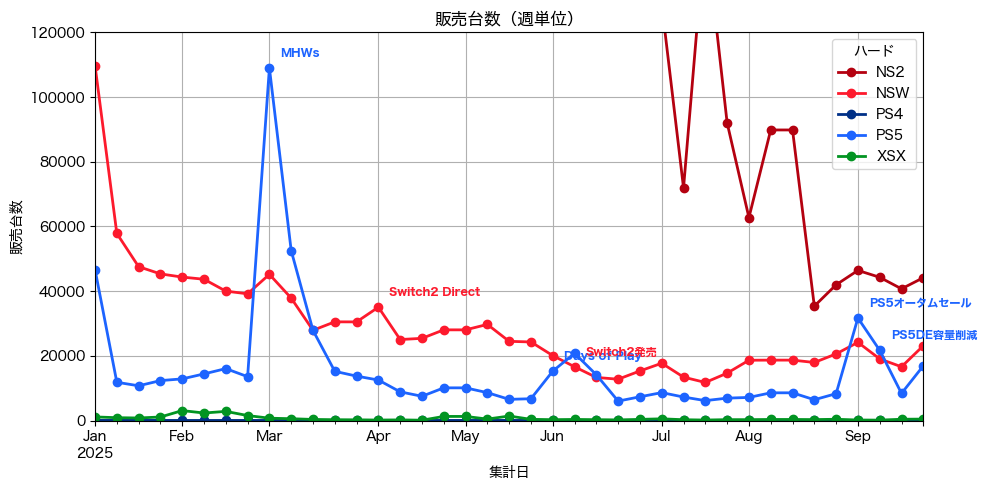

In [5]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), ymax=120000, event_mask=report_event_mask)

## 2025年月間販売推移

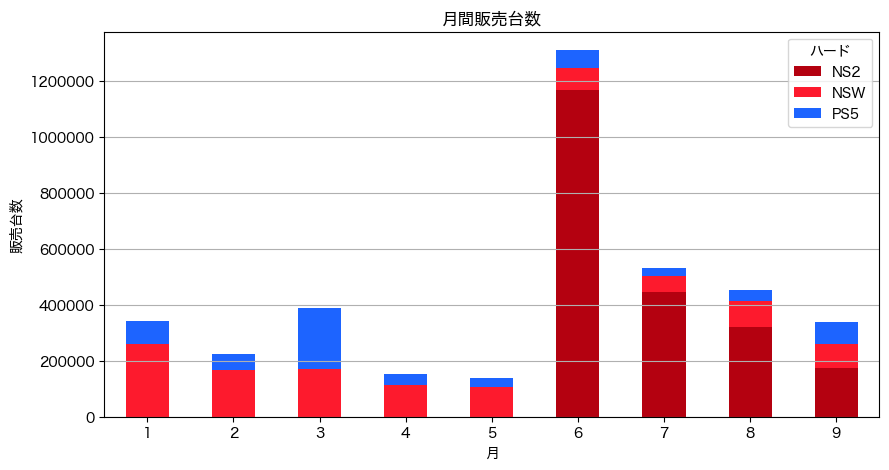

In [6]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW"], year=2025, stacked=True)

9月の月間販売台数順は Nintendo Switch2 > Nintendo Switch > PlayStation5となりました。
先週までは PS5 > Switchだったんですが、サイレントヒルf効果だけでは不足でした。

In [7]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}'})
display(df)

### Nintendo Switchの月間販売台数： 2023,2024年との比較

8月が前年比41.5%、9月は前年比26.9%の大幅な下落です。7月の前年比が25.1%なので
今年2番目の落ち込みです。このまま年末商戦で世代交代が進むのか注目です。

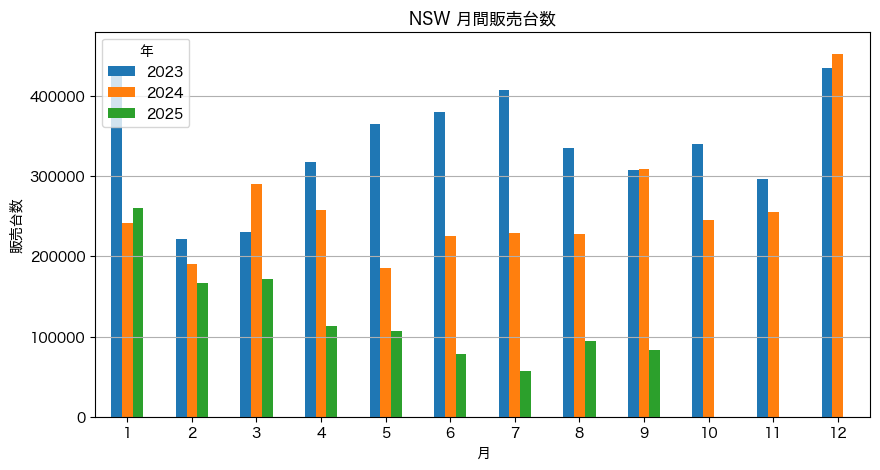

In [8]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,9,28))

### PlayStation 5の月間販売台数： 2023, 2024年との比較

#### 9月は前年比プラスに！

サイレントヒルf効果で16,911台販売し、前年比105.6%と100%を超えました。
PS5が前年を上回ったのは3月以来です。
サイレントヒルfでここまで伸びるとは思っていませんでした。

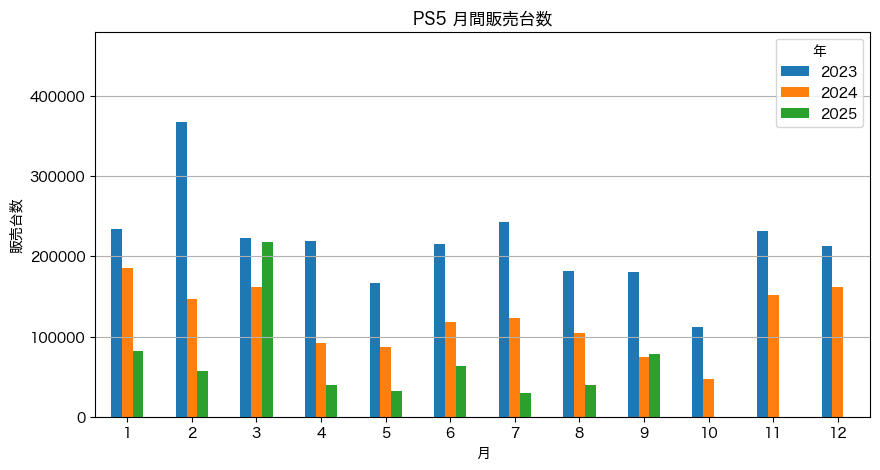

In [9]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,9,28))

## 累計販売推移

累計については、しばらく状況変化無いでしょう。ホリデーシーズンに各機どこまで上昇カーブが描けるか。

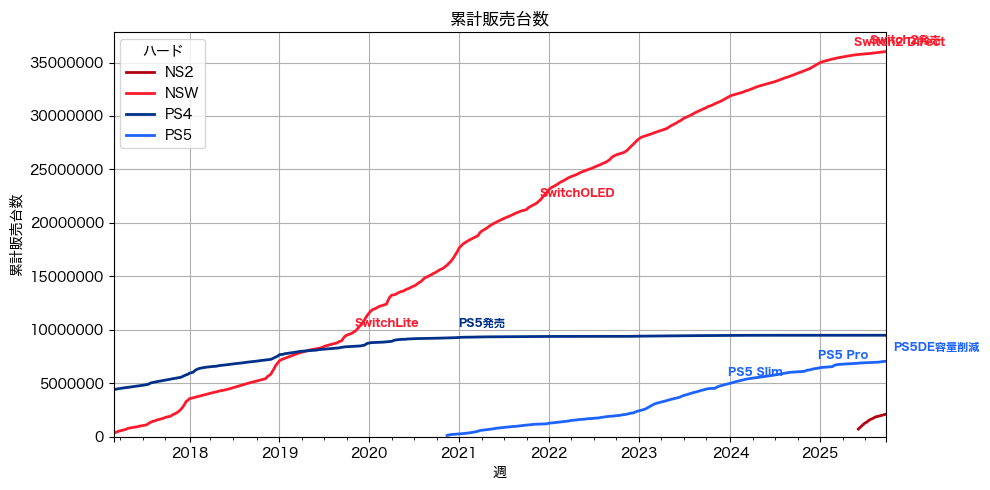

In [10]:
long_range_event_mask = {'hard': 1}
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


## Switch2販売状況

### 歴代機種との比較

#### PS2推移を下回ることはなさそう

ZA週発売直前は第18週です。この時点のPS2は2,179,654台、Switch2は現在2,109,622台で、その差は70,032台です。
Switch2が次週、次々週に4万台をキープできれば第18週は約1万台差でSwitch2がPS2を上回ります。
その翌週はZA同梱版が大量出荷されるので差が大きく開く見込みです。

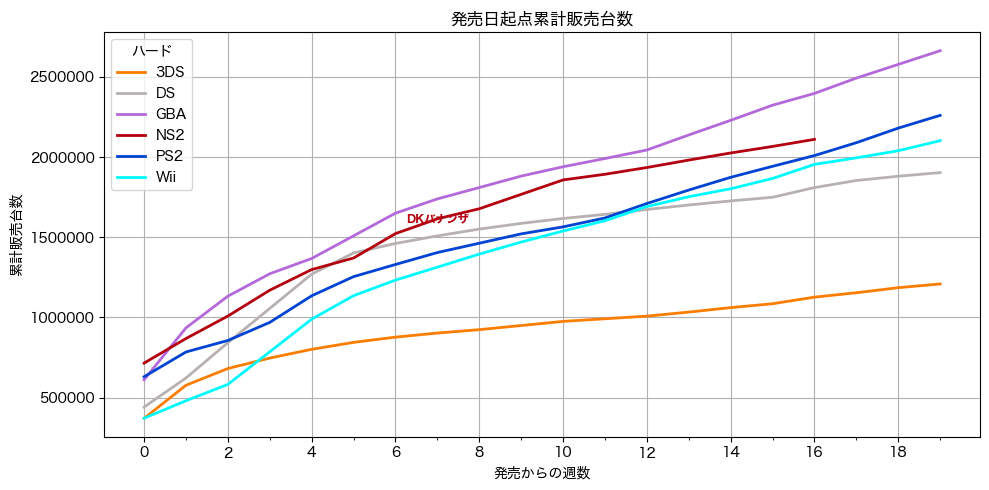

In [11]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                        mode="week", xgrid=2, end=19,
                                        event_mask=report_event_mask)

In [12]:
df12 = df.iloc[df.index == 16]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

## Switch/Switch2ロンチ比較

#### 安定のSwitch2出荷台数

ロンチ週以降のSwitchとSwitch2の販売状況の比較です。
4万台水準で安定してます。ZA同梱版まではこの傾向と思われます。

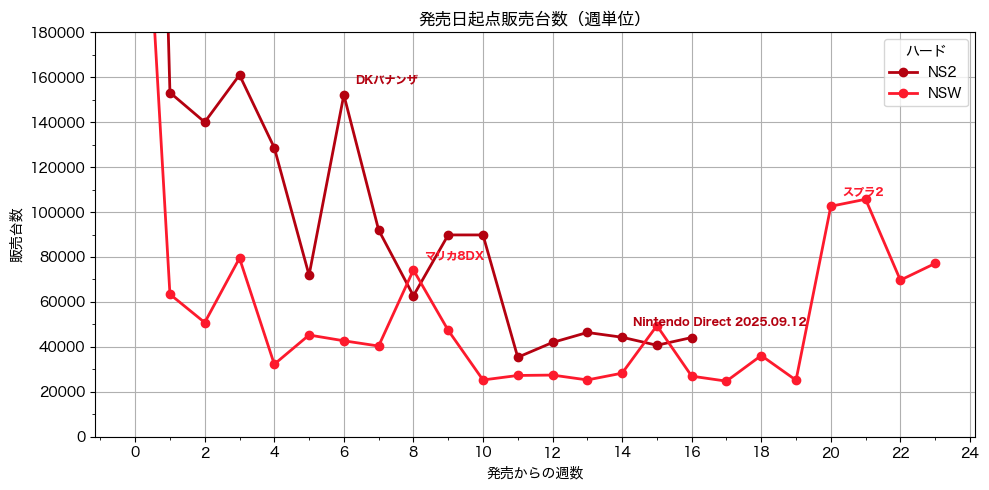

In [13]:
switch_event_mask ={'hard': 5, 'event': 2, 'soft':3, }
(fig, df) = ph.plot_sales_by_delta(hw=["NSW", "NS2"], end=23, ymax=180000, xgrid=2, ygrid=20000, mode="week", event_mask=switch_event_mask)


## 年単位の状況

(2025年については9月までの状況です)

全機種合わせた年毎のハード販売の状況です。
2024年は500万台を割り込む状況でしたが、2025年は500万台を超える可能性があります。
というかSwitch2ローンチ年に超えないとヤバイですね。全てはSwitch2の出荷次第です。
順調なら年間600万の水準も狙えます。

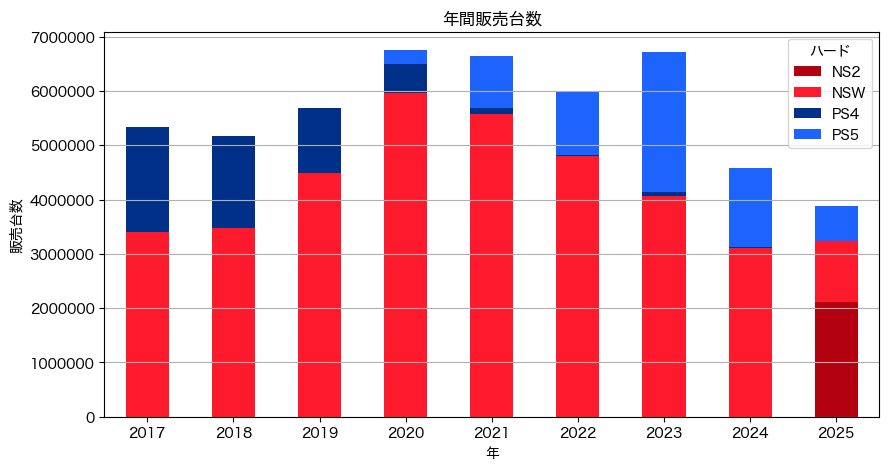

In [14]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2'], begin=datetime(2017,1,1), end=datetime(2025,12,31), stacked=True)

Switch2の販売台数の延びにより、任天堂が2025年に記録的シェアを達成する可能性が高まっています。

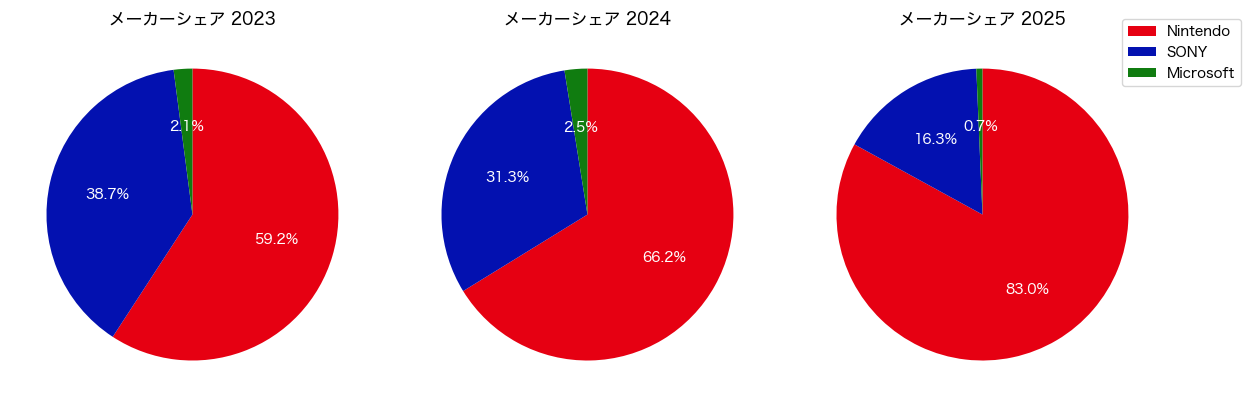

In [15]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2023, end_year=2025)